<a href="https://colab.research.google.com/github/therrshan/Machine-Learning-Practice/blob/main/CS6140_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

**Question 4. Computation problem**
* Given function






In [ ]:
def f(x):
    return 1 + 2 * x - 2 * x**2

**1. Generate training data and plot**

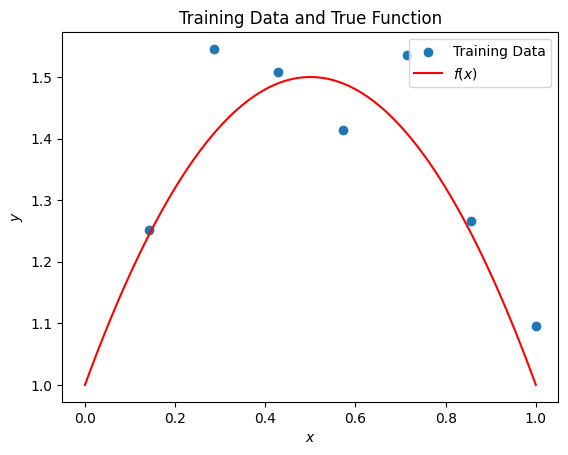

In [ ]:
x_train = np.array([i/7 for i in range(1, 8)])
y_train = f(x_train) + 0.1 * np.random.normal(0, 1, size=len(x_train))

plt.scatter(x_train, y_train, label='Training Data')
x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, f(x_vals), label='$f(x)$', color='red')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Training Data and True Function')
plt.show()

**2. Find best-fit polynomials for degrees 0 to 6 - Subplots**

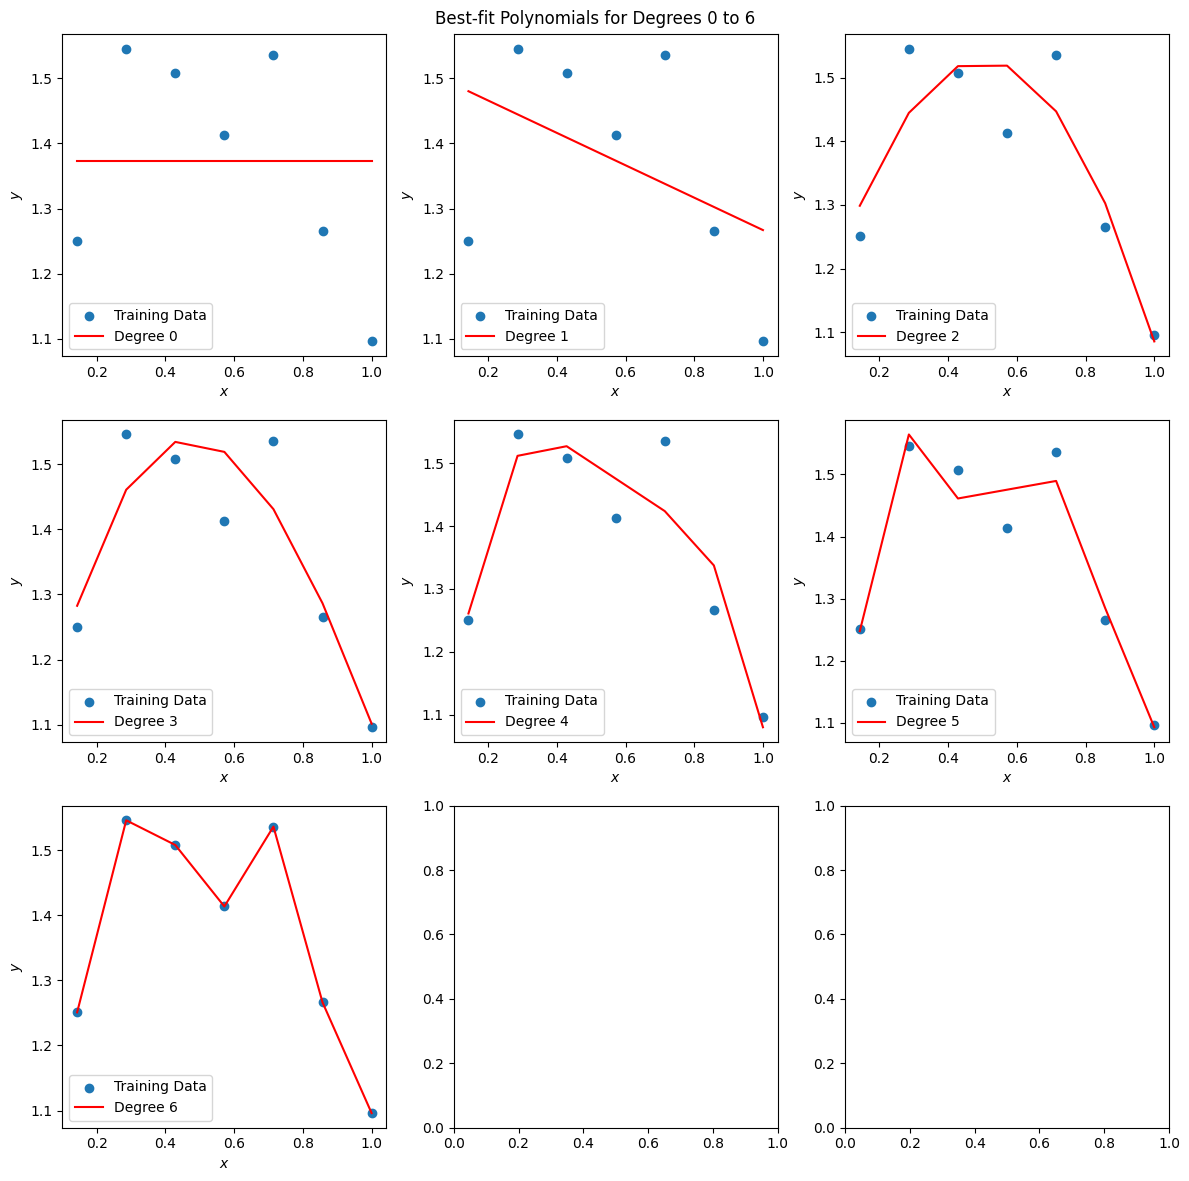

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Best-fit Polynomials for Degrees 0 to 6')

for d, ax in zip(range(7), axs.flatten()):
    X = np.vander(x_train, d+1, increasing=True)
    theta = solve(X.T @ X, X.T @ y_train)
    y_pred = X @ theta
    ax.scatter(x_train, y_train, label='Training Data')
    ax.plot(x_train, y_pred, label=f'Degree {d}', color='red')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend()

plt.tight_layout()

plt.show()

**3.Plot training MSE vs degree**

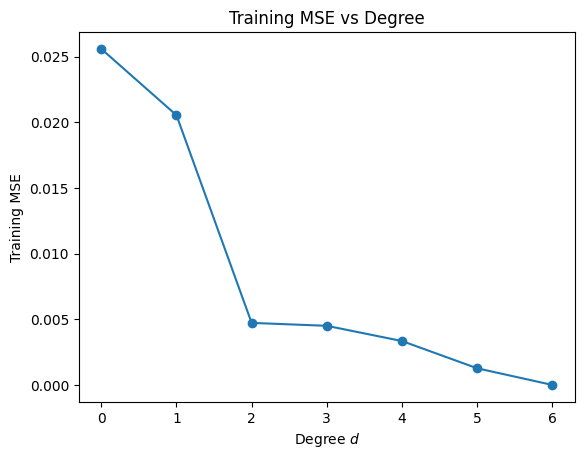

The degree 6 polynomial gives the least MSE : 2.639421255187896e-17


In [ ]:
degrees = range(7)
mse_train = []

for d in degrees:
    X_train = np.vander(x_train, d+1, increasing=True)
    theta = solve(X_train.T @ X_train, X_train.T @ y_train)
    y_pred = X_train @ theta
    mse_train.append(np.mean((y_train - y_pred)**2))

plt.plot(degrees, mse_train, marker='o')
plt.xlabel('Degree $d$')
plt.ylabel('Training MSE')
plt.title('Training MSE vs Degree')
plt.show()

print(f'The degree {mse_train.index(min(mse_train))} polynomial gives the least MSE : {min(mse_train)}')

**4. Generate test data and plot test MSE vs degree**

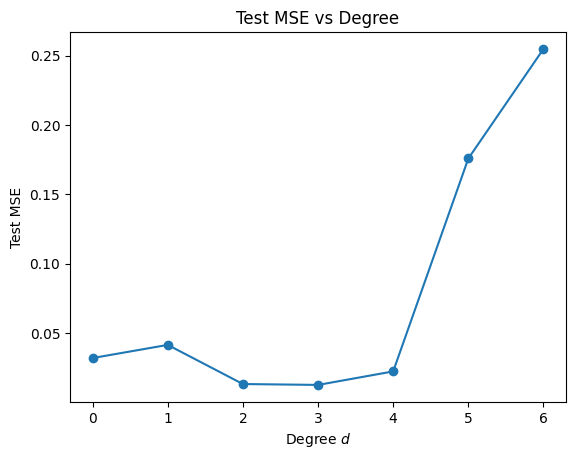

The degree 3 polynomial gives the least MSE : 0.012373715423148707


In [ ]:
x_test = np.random.rand(1000)
y_test = f(x_test) + 0.1 * np.random.normal(0, 1, size=len(x_test))

degrees = range(7)
mse_test = []

for d in degrees:
    X_train = np.vander(x_train, d+1, increasing=True)
    X_test = np.vander(x_test, d+1, increasing=True)
    theta = solve(X_train.T @ X_train, X_train.T @ y_train)
    y_pred = X_test @ theta
    mse_test.append(np.mean((y_test - y_pred)**2))

plt.plot(degrees, mse_test, marker='o')
plt.xlabel('Degree $d$')
plt.ylabel('Test MSE')
plt.title('Test MSE vs Degree')
plt.show()

print(f'The degree {mse_test.index(min(mse_test))} polynomial gives the least MSE : {min(mse_test)}')